In [35]:
import slam
from importlib import reload

In [36]:
model, matching = slam.get_models()

Loaded SuperPoint model
Loaded SuperGlue model ("indoor" weights)


In [37]:
image_prefix = "indoor3"

In [38]:
slam.sample_video(image_prefix)

In [39]:
reload(slam)
images = slam.get_images(image_prefix)
match_inputs = [slam.preprocess_image_matcher(x) for x in images]
depth_inputs = [slam.preprocess_image_depth(x) for x in images]
depths = [slam.get_depth(image=x, model=model) for x in depth_inputs]

['./images/indoor3/_img00000.jpg', './images/indoor3/_img00001.jpg', './images/indoor3/_img00002.jpg', './images/indoor3/_img00003.jpg', './images/indoor3/_img00004.jpg', './images/indoor3/_img00005.jpg', './images/indoor3/_img00006.jpg', './images/indoor3/_img00007.jpg', './images/indoor3/_img00008.jpg', './images/indoor3/_img00009.jpg', './images/indoor3/_img00010.jpg', './images/indoor3/_img00011.jpg', './images/indoor3/_img00012.jpg', './images/indoor3/_img00013.jpg', './images/indoor3/_img00014.jpg', './images/indoor3/_img00015.jpg', './images/indoor3/_img00016.jpg', './images/indoor3/_img00017.jpg', './images/indoor3/_img00018.jpg', './images/indoor3/_img00019.jpg', './images/indoor3/_img00020.jpg', './images/indoor3/_img00021.jpg', './images/indoor3/_img00022.jpg', './images/indoor3/_img00023.jpg', './images/indoor3/_img00024.jpg']


In [40]:
reload(slam)
matches = slam.get_matches(inputs=match_inputs, model=matching, num_matches=-1)
matches_3d = slam.project_matches_to_3d(matches, depths, camera_params=slam.iPhone15ProSquareVideoCamera())

In [41]:
transforms = [slam.get_transform(m[0], m[1]) for m in matches_3d]
angles = [slam.decompose_rotation_matrix(t[0]) for t in transforms]
elevation = [a[2] for a in angles]
azimuth = [a[1] for a in angles]

for i, (a, t) in enumerate(zip(angles, transforms)):
    x,y,z = a
    print(str(i) + ": {: <15}".format(f"x deg {x:.3f}") + "{: <15}".format(f"y deg {y:.3f}") + "{: <15}".format(f"z deg {z:.3f}"))

print()
for i, (a, t) in enumerate(zip(angles, transforms)):
    x,y,z = t[1]
    print(str(i) + ": {: <15}".format(f"x {x:.3f}") + "{: <15}".format(f"y {y:.3f}") + "{: <15}".format(f"z {z:.3f}"))


0: x deg -0.129   y deg -0.383   z deg 0.242    
1: x deg -0.518   y deg 0.562    z deg 0.346    
2: x deg -0.736   y deg -0.671   z deg -0.773   
3: x deg -0.957   y deg 3.338    z deg 0.014    
4: x deg 1.261    y deg 11.443   z deg -2.134   
5: x deg 5.260    y deg 14.324   z deg -0.813   
6: x deg 1.279    y deg 8.642    z deg -1.636   
7: x deg -0.869   y deg -4.348   z deg -1.329   
8: x deg 1.838    y deg -3.788   z deg 0.020    
9: x deg 0.889    y deg -4.501   z deg 0.908    
10: x deg 1.643    y deg -1.577   z deg 3.617    
11: x deg -2.022   y deg -14.464  z deg 4.304    
12: x deg 1.227    y deg -9.603   z deg 2.862    
13: x deg -1.189   y deg -10.925  z deg 2.483    
14: x deg -1.604   y deg -9.699   z deg 4.506    
15: x deg -1.900   y deg -12.451  z deg 4.137    
16: x deg -2.225   y deg -10.995  z deg 3.388    
17: x deg -3.065   y deg -10.861  z deg 3.504    
18: x deg -1.614   y deg -11.919  z deg 4.816    
19: x deg 3.146    y deg -13.566  z deg 1.679    
20: x deg 

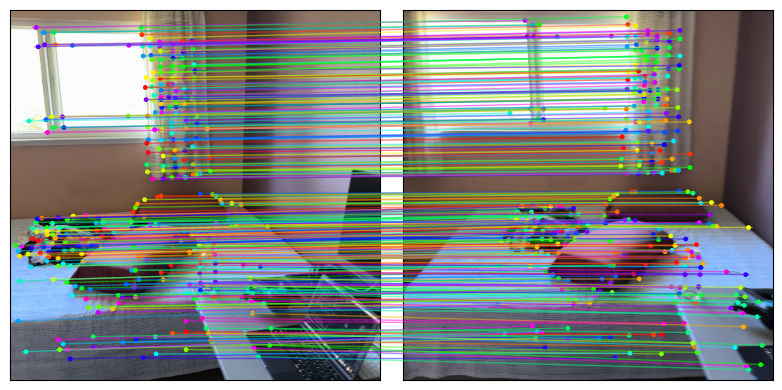

In [42]:
idx = 4
fig = slam.plot_matches(idx, images, matches)

In [43]:
# fig = create_pcd_fig(idx, depths, images)
# fig.show()

In [48]:
reload(slam)
data = slam.training_preprocessor(
    image_prefix=image_prefix, 
    model=model,
    matching=matching,
    camera_params=slam.iPhone15ProSquareVideoCamera(),
    force_reload=True)

['./images/indoor3/_img00000.jpg', './images/indoor3/_img00001.jpg', './images/indoor3/_img00002.jpg', './images/indoor3/_img00003.jpg', './images/indoor3/_img00004.jpg', './images/indoor3/_img00005.jpg', './images/indoor3/_img00006.jpg', './images/indoor3/_img00007.jpg', './images/indoor3/_img00008.jpg', './images/indoor3/_img00009.jpg', './images/indoor3/_img00010.jpg', './images/indoor3/_img00011.jpg', './images/indoor3/_img00012.jpg', './images/indoor3/_img00013.jpg', './images/indoor3/_img00014.jpg', './images/indoor3/_img00015.jpg', './images/indoor3/_img00016.jpg', './images/indoor3/_img00017.jpg', './images/indoor3/_img00018.jpg', './images/indoor3/_img00019.jpg', './images/indoor3/_img00020.jpg', './images/indoor3/_img00021.jpg', './images/indoor3/_img00022.jpg', './images/indoor3/_img00023.jpg', './images/indoor3/_img00024.jpg']


In [49]:
reload(slam)
slam.visualize_camera_poses(data=data)